# 人力资源数据分析

1、数据读取与描述性分析<br>
2、对数据进行探索性分析<br>
  (a)、分析部门与是否离职，以及部门与薪水的关系<br>
  (b)、分析薪水与是否离职的关系<br>
  (c)、分析五年内是否升职与是否离职的关系<br>
  (d)、分析项目数量与是否离职的关系<br>
  (e)、分析司龄与是否离职的关系<br>
  (f)、分析每月在公司工作时间与是否离职的关系<br>
  (g)、分析考核评分与是否离职的关系<br>
  (h)、分析员工满意度与是否离职的关系<br>
3、数据分析建模<br>

## 1.:数据读取与描述性分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
df = df.rename(columns = {
    'satisfaction_level' : '员工满意度', 'last_evaluation' : '考核评分', 'number_project' : '项目数量', 'average_montly_hours':'每月在公司工作时间', 
    'time_spend_company' : '司龄', 'Work_accident':'工作事故', 'left':'是否离职', 'promotion_last_5years':'五年内是否升职', 'Department' : '部门', 'salary' : '薪水'})
df.head()

,员工满意度,考核评分,项目数量,每月在公司工作时间,司龄,工作事故,是否离职,五年内是否升职,部门,薪水
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   员工满意度      14999 non-null  float64
 1   考核评分       14999 non-null  float64
 2   项目数量       14999 non-null  int64  
 3   每月在公司工作时间  14999 non-null  int64  
 4   司龄         14999 non-null  int64  
 5   工作事故       14999 non-null  int64  
 6   是否离职       14999 non-null  int64  
 7   五年内是否升职    14999 non-null  int64  
 8   部门         14999 non-null  object 
 9   薪水         14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,员工满意度,考核评分,项目数量,每月在公司工作时间,司龄,工作事故,是否离职,五年内是否升职
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


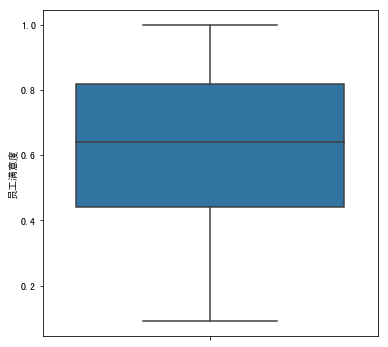

In [7]:
# 员工满意度
plt.figure(figsize=(6,6))
sns.boxplot(data=df,y='员工满意度')

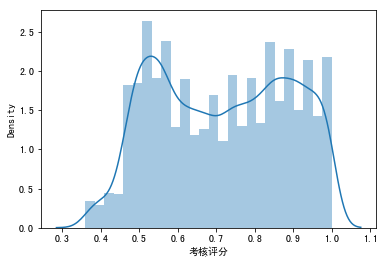

In [8]:
# 考核评分
sns.distplot(df['考核评分'])

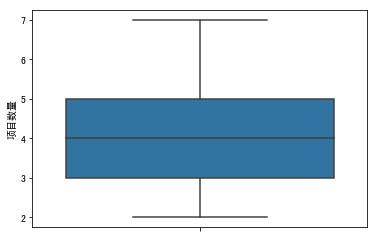

In [9]:
# 项目数量
sns.boxplot(data=df,y='项目数量')

In [10]:
df.columns

Index(['员工满意度', '考核评分', '项目数量', '每月在公司工作时间', '司龄', '工作事故', '是否离职', '五年内是否升职',
       '部门', '薪水'],
      dtype='object')

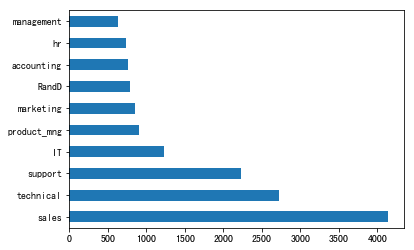

In [11]:
df['部门'].value_counts().plot(kind='barh')

In [12]:
df['薪水'].value_counts()

low       7316
medium    6446
high      1237
Name: 薪水, dtype: int64

In [13]:
df['是否离职'].value_counts()

0    11428
1     3571
Name: 是否离职, dtype: int64

In [14]:
离职占比=df['是否离职'].value_counts()/len(df)
离职占比

0    0.761917
1    0.238083
Name: 是否离职, dtype: float64

In [15]:
# unique唯一值
df['部门'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [16]:
df['薪水'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [17]:
df['薪水'].replace(['low','medium','high'],[1,2,3],inplace=True)

In [18]:
不同薪水占比=df['薪水'].value_counts()/len(df)
不同薪水占比

1    0.487766
2    0.429762
3    0.082472
Name: 薪水, dtype: float64

<function matplotlib.pyplot.show>

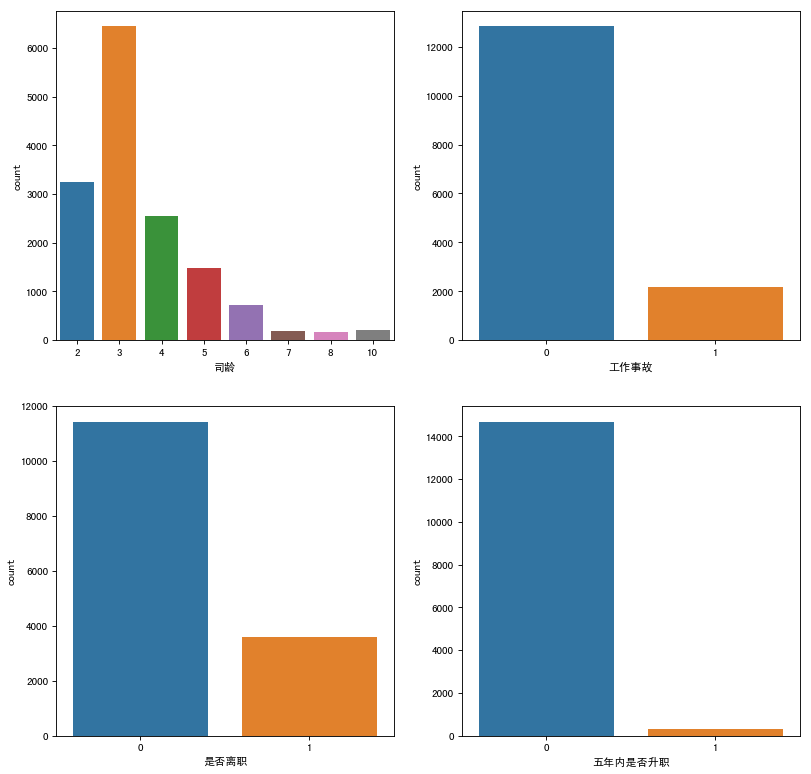

In [19]:
fig=plt.figure(figsize=(12,12),dpi=80)
ax1=fig.add_subplot(2,2,1)
sns.countplot(x='司龄',data=df)
ax2=fig.add_subplot(2,2,2)
sns.countplot(x='工作事故',data=df)
ax3=fig.add_subplot(2,2,3)
sns.countplot(x='是否离职',data=df)
ax4=fig.add_subplot(2,2,4)
sns.countplot(x='五年内是否升职',data=df)
plt.show

## 2.:数据探索性分析

In [20]:
df.groupby('是否离职').mean()

,员工满意度,考核评分,项目数量,每月在公司工作时间,司龄,工作事故,五年内是否升职,薪水
是否离职,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.414730


离职员工比在职员工的平均项目数量多,工作时间长,工作事故少,升值几率低,满意度低

In [21]:
corr=df.corr()
corr

,员工满意度,考核评分,项目数量,每月在公司工作时间,司龄,工作事故,是否离职,五年内是否升职,薪水
员工满意度,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
考核评分,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
项目数量,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
每月在公司工作时间,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
司龄,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
工作事故,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
是否离职,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
五年内是否升职,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
薪水,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


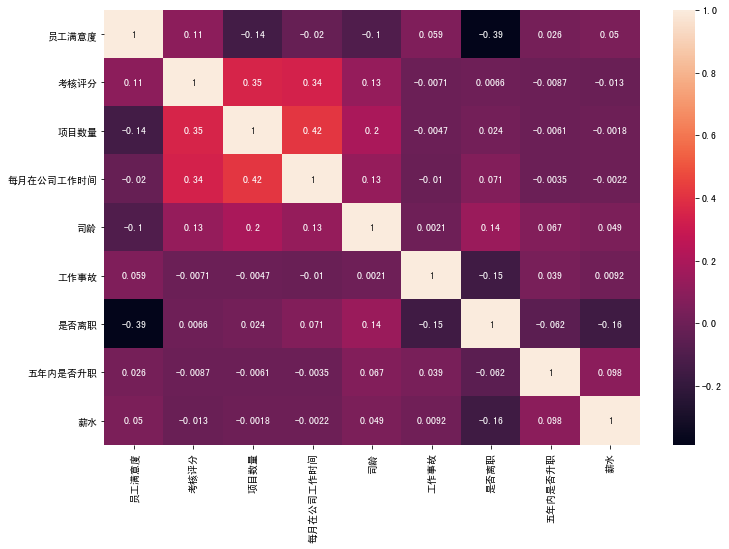

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)
plt.show()

1. 是否离职与员工满意度之间相关性比较高,呈现负相关,满意度越低,越容易离职
2. 考核评分与项目数量,每月在公司工作时间呈现正相关
3. 考核评分没有转换到薪水,升职上来

### (a)分析部门与是否离职,部门与薪水的关系

In [22]:
# df=df.reset_index()

In [23]:
# df

In [65]:
# df.pivot_table(index='部门',columns='是否离职'
#                ,values='项目数量'
#                ,aggfunc=len)

In [63]:
depart_left_table=pd.crosstab(index=df['部门'],columns=df['是否离职'])
depart_left_table

是否离职,0,1
部门,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


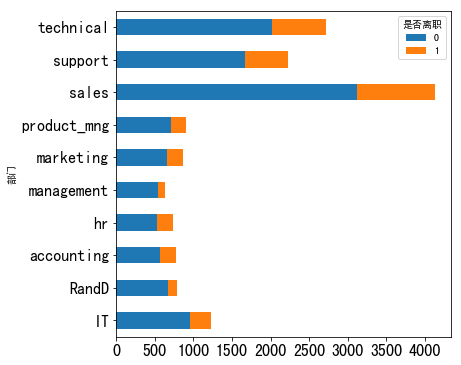

In [30]:
# 堆积条形图
depart_left_table.plot(kind='barh',figsize=(6,6)
                       ,fontsize=16,stacked=True)

In [31]:
depart_salary_table=pd.crosstab(index=df['部门'],columns=df['薪水'])
depart_salary_table

薪水,1,2,3
部门,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


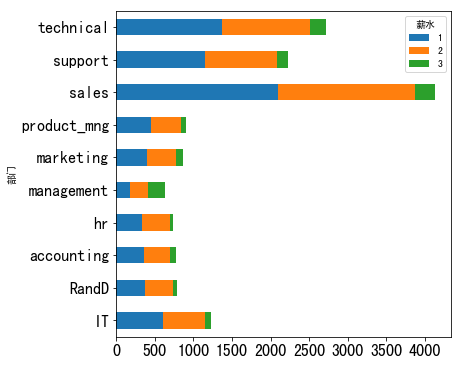

In [32]:
depart_salary_table.plot(kind='barh',figsize=(6,6)
                         ,fontsize=16,
                        stacked=True)

### (b) 分析薪水和是否离职的关系

In [33]:
salary_left_table=pd.crosstab(index=df['薪水'],columns=df['是否离职'])
salary_left_table

是否离职,0,1
薪水,,
1,5144,2172
2,5129,1317
3,1155,82


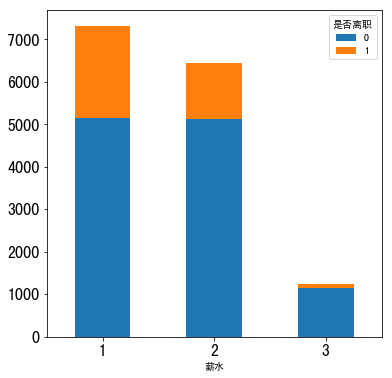

In [36]:
salary_left_table.plot(kind='bar',figsize=(6,6)
                         ,fontsize=16,
                        stacked=True,rot=0)

很形象的看出,离职的员工薪资几乎都在低到中等水平,很少有高薪的员工离开公司

### (c) 五年内是否升职与是否离职的关系

In [37]:
promotion_left_table=pd.crosstab(index=df['五年内是否升职'],columns=df['是否离职'])
promotion_left_table

是否离职,0,1
五年内是否升职,,
0,11128,3552
1,300,19


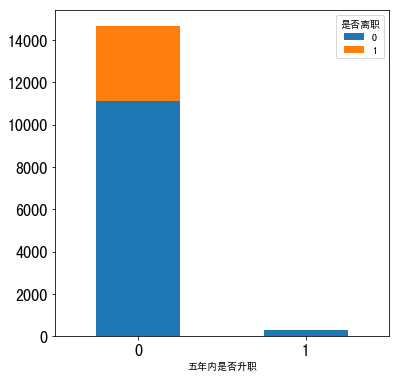

In [38]:
promotion_left_table.plot(kind='bar',figsize=(6,6)
                         ,fontsize=16,
                        stacked=True,rot=0)

### (d)、分析项目数量与是否离职的关系

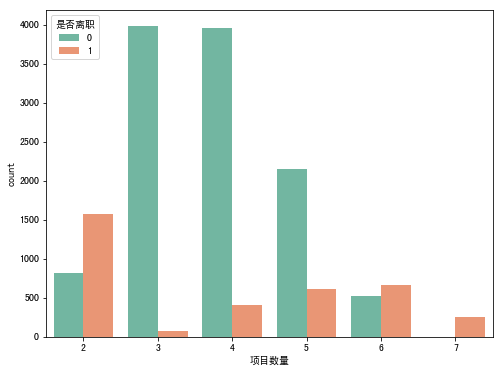

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(x='项目数量',hue='是否离职',data=df,palette='Set2')
plt.show()

1. 当项目数量为2,6,7.员工更容易离职
2. 项目数量为7,全部离职
3. 项目数量在3个以上时,随着项目数量增加,员工更容易离职

### (e)、分析司龄与是否离职的关系

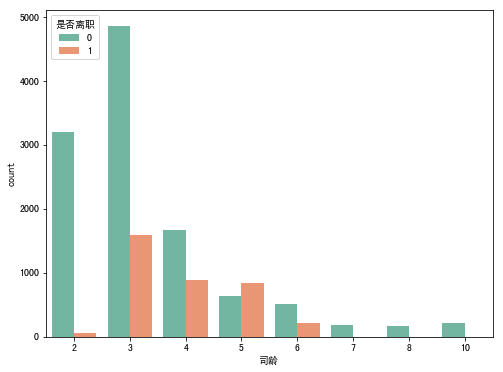

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(x='司龄',hue='是否离职',data=df,palette='Set2')
plt.show()

In [52]:
company_left_table=pd.crosstab(index=df['司龄'],columns=df['是否离职'])
# company_left_table

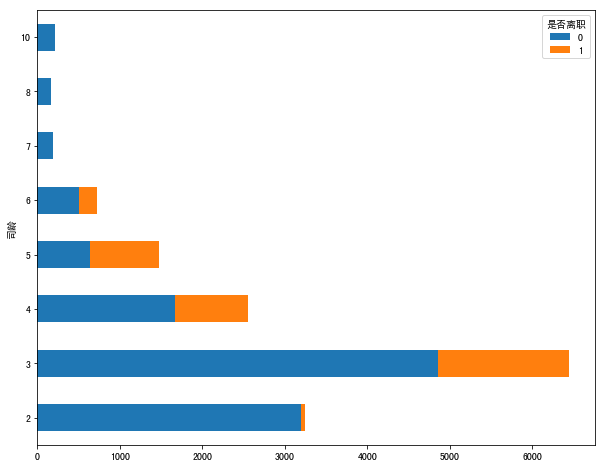

In [55]:
company_left_table.plot(kind='barh',figsize=(10,8),stacked=True)

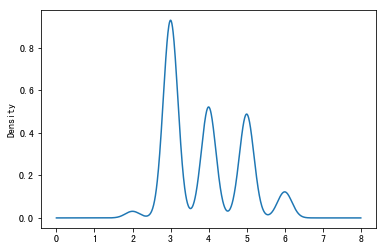

In [60]:
# df.loc[(df['是否离职']==1),'司龄'].plot(kind='hist')
df.loc[(df['是否离职']==1),'司龄'].plot(kind='kde')

### (f)、分析每月在公司工作时间与是否离职的关系

In [75]:
hours_left_table=pd.crosstab(index=df['每月在公司工作时间'],columns=df['是否离职'])
# hours_left_table

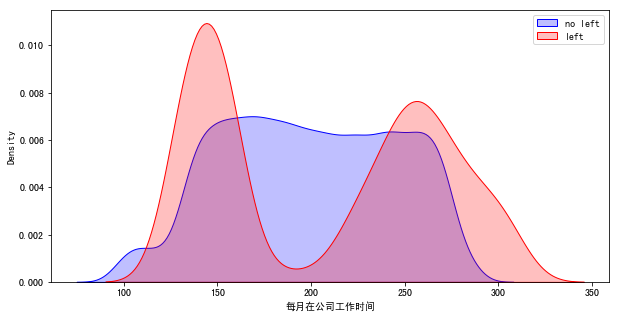

In [77]:
plt.figure(figsize=(10,5))
# 没有离职的数据
sns.kdeplot(df.loc[(df['是否离职']==0),'每月在公司工作时间']
            ,color='b',shade=True,label='no left')
plt.legend()
# 离职的数据
sns.kdeplot(df.loc[(df['是否离职']==1),'每月在公司工作时间']
            ,color='r',shade=True,label='left')
plt.legend()
plt.show()

1. 工作时间较低的员工和工作时间较高的员工更容易离职。
2. 工作时间在160-240小时之间的员工不容易离职。
3. 是一个很明显的双峰分布，说明员工平均每月工作时间少的（低于150小时）和工作时间多的（高于250小时）的员工离职率最高。
4. 所以一般离开公司的员工要么工作时间少的，要么过度工作的。

(g)、分析考核评分与是否离职的关系

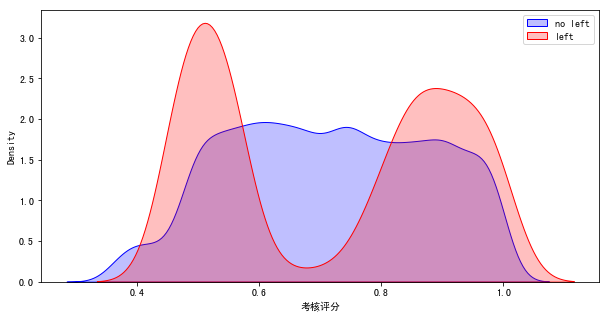

In [79]:
evaluation_left_table=pd.crosstab(index=df['考核评分'],columns=df['是否离职'])
fig=plt.figure(figsize=(10,5))
sns.kdeplot(df.loc[(df['是否离职']==0),'考核评分'],color='b',shade=True,label='no left')
plt.legend()
sns.kdeplot(df.loc[(df['是否离职']==1),'考核评分'],color='r',shade=True,label='left')
plt.legend()

离职员工的考核评分主要分为两部分， 一部分考核评分较低，另一部分考核评分较高。 这也说明评分低的员工更容易离开公司，评分较高的员工也容易离开公司。
评分成绩在0.6-0.8左右的员工不容易离开公司。

又是一个双峰分布，表现糟糕的和表现出色的出现了离职的两个峰值，根据前边的分析，效绩评估出色的员工，公司没有相应的转化到升职和薪资上。0.6-0.8之间有比较好的员工留存。

(h)、分析员工满意度与是否离职的关系

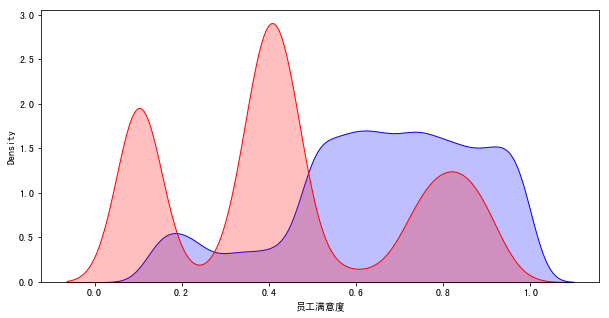

In [85]:
satis_left_table=pd.crosstab(index=df['员工满意度'],columns=df['是否离职'])
satis_left_table
fig=plt.figure(figsize=(10,5))
sns.kdeplot(df.loc[(df['是否离职']==0),'员工满意度'],color='b',shade=True,label='no left')
sns.kdeplot(df.loc[(df['是否离职']==1),'员工满意度'],color='r',shade=True,label='left')

离职员工的满意度分为三大部分，0-0.2：极度不满意， 0.25-0.5：比较不满意， 0.7-0.9：很满意。
在职员工的满意的主要集中在0.5-0.9， 满意度较高。

出现了三个峰值，满意度低于0.1的员工基本离职，满意度在0.3-0.5之间离开的员工又到达一个峰值，满意度在0.8左右时，又出现了一个峰值，这些是满意度较高的员工，这些员工可能找到了更好的工作机会，离职不是对公司不满，这些员工对公司是有比较高的满意度的。

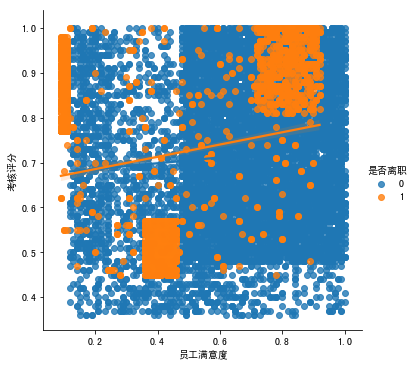

In [86]:
sns.lmplot(x='员工满意度', y='考核评分',data=df,hue='是否离职')

离职员工分为三种：<br>

第一种（努力工作但对公司不满意）<br>
员工满意程度小于0.2，但最终评价大于0.75。 这可能说明 这些离开的员工非常勤奋努力， 但公司让他们沮丧，产生不满， 从而离开公司。<br>

第二种（评价不高对公司满意度也低）<br>
员工满意程度在0.35-0.5之间， 评价在0.58以下。 这可能表明 这些评价不高的员工在平时的工作中对公司的满意度也比较低<br>

第三种 （评价高且对公司比较满意）<br>
员工满意程度在0.7-0.9 之间， 且评价也在0.8-1.0 之间。这可能说明这个部分的员工是最理想的， 他们对自己工作的满意度比较高且得到的评价也高。<br>